<a href="https://colab.research.google.com/github/tomersk/python-applications/blob/main/01_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Reading Netcdf file for each year

In [1]:
from google.colab import drive
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [2]:
startyear=1901
endyear=1902
File_name=np.arange(startyear, endyear+1, 1)
file = '/content/gdrive/My Drive/Colab Notebooks/IMD/rain_'+str(startyear)+'.nc'
ds = nc.Dataset(file)
latitude=ds.variables['lat'][:]
longitude=ds.variables['lon'][:]
rainfall=ds.variables['rain'][:]
ds.close()
AMS=np.empty((rainfall.shape[0],rainfall.shape[1],len(File_name)))


for f in range(len(File_name)):
    file = '/content/gdrive/My Drive/Colab Notebooks/IMD/rain_'+str(File_name[f])+'.nc'
    ds = nc.Dataset(file)
    rainfall=ds.variables['rain'][:]
    AMS[:,:,f]=rainfall[:,:,:].max(2)
    ds.close()

2. Visualizing Data- 1 Day mean annual maximum rainfall plot

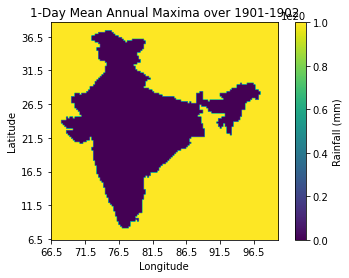

In [ ]:
plt.imshow(AMS[:,:,:].mean(2))
cbar=plt.colorbar()
cbar.set_label('Rainfall (mm)')
x=np.arange(0, 140, 20)
plt.xticks(x,longitude[x])
y=x=np.arange(0, 140, 20)
plt.yticks(y,latitude[y])
plt.gca().invert_yaxis()
plt.title("1-Day Mean Annual Maxima over "+str(startyear)+"-"+str(endyear))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

2. Visualizing Yearly rainfall maxima at a location

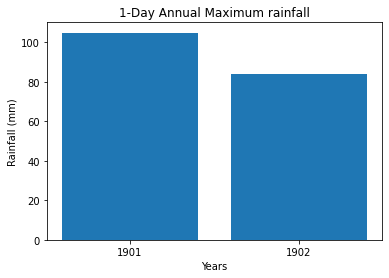

In [ ]:
plt.bar(["1901", "1902"],AMS[latitude.tolist().index(23.5),longitude.tolist().index(85.5),:])
plt.title("1-Day Annual Maximum rainfall")
plt.xlabel('Years')
plt.ylabel('Rainfall (mm)')
plt.show()
